In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
null_percent = df.isnull().mean()
null_percent

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [9]:
# removing null inputs greater that 40%
threshold = 0.4
df_clean = df.loc[:,null_percent<=threshold]
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [10]:

print("Old data frame ",df.shape)
print("Cleaned data frame ",df_clean.shape)
print("deleted column is",set(df.columns)-set(df_clean.columns))

Old data frame  (418, 12)
Cleaned data frame  (418, 11)
deleted column is {'Cabin'}


In [11]:
#visualisation
import matplotlib.pyplot as plt

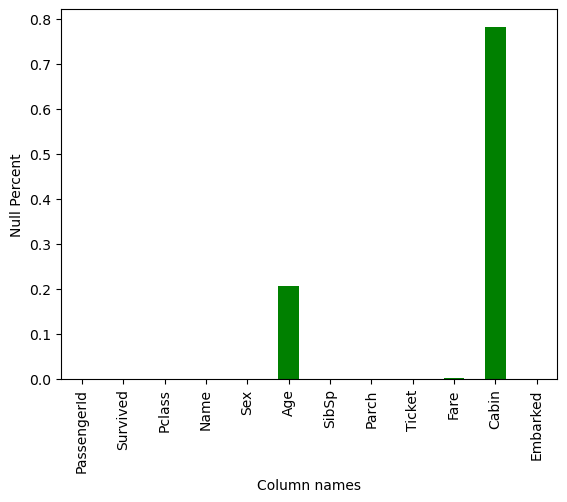

In [12]:
null_percent.plot(kind="bar", color="green")
plt.xlabel("Column names")
plt.ylabel("Null Percent")
plt.show()

<h2>Replacing null values with mean, median, mode</h2>
age,fare

In [13]:
df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h3>Replacing null values in fare</h3>

In [14]:
df_clean['Fare'].isnull().mean()

0.0023923444976076554

<P>Replacing null values with the following :</P>

<h4 >df['column_name'].fillna(value, inplace=False, method=None)
</h4>
<ol>
    <li>Mean Imputation</li>
    <p>Fill missing values with the mean of the column. <br>
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)<br>
    Pros: Simple. Cons: Sensitive to outliers.</p>
    <li>Median Imputation</li>
    <p>df['Fare'].fillna(df['Fare'].median(), inplace=True)<br>
    Pros: Robust to outliers.<br>Cons: Still loses some variability.</p>
    <li>Mode Imputation</li>
    <p>df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)<br>
    Pros: Simple.<br>
    Cons: Doesn’t make much sense for a wide range of prices.</p>
    
</ol>
there is more. these are the basic. <br>
here we use median 

In [15]:
#df_clean['Fare'].fillna(df['Fare'].median(), inplace=True) # inplace = true modifies og dataframe false returns new datafame
df_clean.loc[:,'Fare']=df_clean['Fare'].fillna(df['Fare'].median(), inplace=False)

In [16]:
df_clean.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

hence the null values in age is tackled. now moving on to age. age it is better to use mode? No. cz age is not a catagorical data.
<h3>Group-based imputation (better)</h3>
Impute missing Age based on groups like Pclass or Sex.
<br><br>Example: fill missing ages with median age of passengers in the same Pclass.

<h3> syntax df['target_column'] = df.groupby('group_column')['target_column'].transform(lambda x: x.fillna(x.median()))

</h3>

In [17]:
#here using mode for easy
df_clean.loc[:,'Age']=df_clean['Age'].fillna(df['Age'].median(), inplace=False)

In [18]:
df_clean.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

All null values are tackled

In [19]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<h1>DEALING WITH NON-NUMERICAL VALUES </h1>

In [20]:
#USING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df_clean.loc[:,'Sex'] = le.fit_transform(df['Sex'])

fit_transform does two things:

fit: Learns the parameters from the data (e.g., finds unique labels for encoding).

transform: Applies the transformation based on learned parameters.

In [22]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [23]:
df_clean['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [24]:
df_clean['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [25]:
#USING LABEL ENCODER
df_clean.loc[:,'Embarked'] = le.fit_transform(df['Embarked']) 

In [26]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [27]:
#name is not neccessary 
df_clean = df_clean.drop('Name',axis=1)

In [28]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,1
1,893,1,3,0,47.0,1,0,363272,7.0000,2
2,894,0,2,1,62.0,0,0,240276,9.6875,1
3,895,0,3,1,27.0,0,0,315154,8.6625,2
4,896,1,3,0,22.0,1,1,3101298,12.2875,2


In [29]:
df_clean.shape

(418, 10)

<h1>SPLITTING THE DATA</h1>

In [46]:
x = df_clean.drop('Survived',axis = 1)
y = df_clean['Survived']
# remove string vaues
x = pd.get_dummies(x, drop_first=True)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(334, 371)
(334,)
(84, 371)
(84,)


In [45]:
#feature scaling [making values like age, class all in same important.(higher value of age may imply its more imp while its not)]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  #learn scaling param. frm data. shouldnt do it on test
x_test = scaler.transform(x_test)

<h1> Model fitting</h1>

In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale')

In [49]:
svm.fit(x_train,y_train)

SVC(C=10)

In [50]:
y_pred = svm.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9404761904761905
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        50
           1       0.97      0.88      0.92        34

    accuracy                           0.94        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.94      0.94      0.94        84



<h1 ><FONT color = "Green"> ACCURACY OF 94.04%</FONT></h1>